# Question 1

### a. What actions on your dataset would you consider to take in order to improve the performance of the model?
Data quality can be improved in order to enhance model's performance through:


1.  Imputing Missing values.
2.  Removing unnecessary variables.
3.  Scalling of the data.
4.  Vectorization of the textual data.
5.  Removing of outliers in the data.














### b. What would you consider to try for the existing algorithm to improve the performance of the model? Hint: Think about hyperparameters.


<p align="justify">
The only way to improve an existing model it parameter tuning. Finding the best value for each parameter is the goal of parameter tuning in order to increase the model's accuracy. You must have a solid grasp of the significance of each parameter and how it affects the model individually in order to fine-tune it. This procedure may be repeated with several effective models.
</p>



### c. What other algorithms would you consider to try in this case? Why? Explain.


<p align="justify">
I am also capable of doing the task of tuning the parameters of a decision tree. The scikit-learn algorithm, the CART algorithm, has a preferred range of min samples split values that varies from dataset to dataset. The min-samples-split method controls over-fitting. Values beyond this threshold prevent a model from discovering connections that are very specific to the training sample. You may play about with the min samples split values to find a happy medium between underfitting and overfitting. Underfitting may also occur at too high numbers.
</p>

# Question 2

### a. Mixed Naive Bayes Classifier

In [66]:
import pandas as pd
import numpy as np
data_H= pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/heart.csv')
data_H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
data_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [68]:
!pip install mixed-naive-bayes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import LabelEncoder
   
cat= ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for i in cat:
    label_encoder = LabelEncoder()
    data_H[i] = label_encoder.fit_transform(data_H[i])

In [70]:
from sklearn.model_selection import train_test_split

X= data_H.drop(columns= ['target'])
y= data_H.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.metrics import classification_report

model = MixedNB(categorical_features=[1,2,5,6,8,10, 11,12])
model.fit(X_train,y_train)

y_pred_test= model.predict(X_test)
y_pred_train= model.predict(X_train)

## get accuracy score, and other validation metrics
print("Train Classification report:\n", classification_report(y_train,y_pred_train))

print("Test Classification report:\n", classification_report(y_test,y_pred_test))


Train Classification report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       397
           1       0.86      0.88      0.87       423

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820

Test Classification report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       102
           1       0.79      0.89      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



### b.



<p align="justify">
In terms of preformance, the mixed naive bayes classifier above performed way above average. It has the accuracy of 82% which is good for any classification model. However, its performance is below that of Gaussian Naibe Bayes classifier.
</p>

###c.

<p align="justify">
Data that is produced using both artificial intelligence (synthetic data) and actual occurrences is known as hybrid data.

LDA/GDA has no straightforward generalization because they work well when supplied tabula data. 
</p>

# Question 3

### a. Spliting the dataset

In [72]:
LDA_QDA_Toy_Data= pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/LDA-QDA-Toy-Data.csv', index_col=0)

cat= ['$x_1$', '$x_2$','$y$']
for x in cat:
    label_encoder = LabelEncoder()
    LDA_QDA_Toy_Data[x] = label_encoder.fit_transform(LDA_QDA_Toy_Data[x])
    

X1= LDA_QDA_Toy_Data.drop(columns= ['$y$'])
y1= LDA_QDA_Toy_Data['$y$']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)


### b. Training and prediction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1_train, y1_train)

test1_y_pred= lda.predict(X1_test)
test1_y_pred

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

QDA_Model= QuadraticDiscriminantAnalysis()

QDA_Model.fit(X1_train,y1_train)

test2_y_pred= QDA_Model.predict(X1_test)
test2_y_pred

### c. Calculate the relevant accuracy metrics by presenting the classi cation report for both train and test subsets. Assess the two classi ers and contrast their performances.

In [108]:
## get accuracy score, and other validation metrics
print("LDA Accuracy:", metrics.accuracy_score(y1_test, test1_y_pred),'\n')
print("LDA Classification report:\n", classification_report(y1_test,test1_y_pred))

print("QDA Accuracy:", metrics.accuracy_score(y1_test, test2_y_pred),'\n')
print("QDA Classification report:\n", classification_report(y1_test,test2_y_pred))


LDA Accuracy: 0.564 

LDA Classification report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.63       422
           1       0.50      0.45      0.48       328

    accuracy                           0.56       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.56      0.56      0.56       750

QDA Accuracy: 0.9546666666666667 

QDA Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       422
           1       0.97      0.93      0.95       328

    accuracy                           0.95       750
   macro avg       0.96      0.95      0.95       750
weighted avg       0.96      0.95      0.95       750



**Accessing the output of classifiers-**

1. From above two models lda and qda the best performing model on the given dataset is QDA model. The overall accuracy of QDA model is **95.4%** whereas the LDA model has **56.4%** which is very bad.
2. The LDA model is not able to predict the output class label 1 generating **48%** f1 score. As compared to this QDA model has performed well generating output class label 1 f1 score to **95%**.

### d. Use plot decision regions from the plotting module of the mlxtend library to plot the decision regions for the two classi ers in the two dimensional feature space formed by x1 and x2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


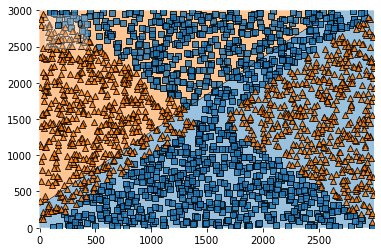

In [76]:
from mlxtend.plotting import plot_decision_regions

X1_train=X1_train.to_numpy()
y1_train=y1_train.to_numpy()

plot_decision_regions(X1_train, y1_train, clf=lda, legend=2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


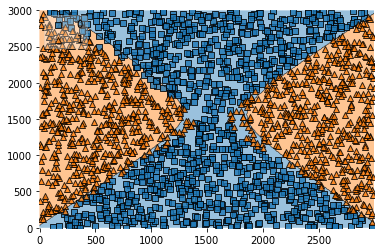

In [77]:
plot_decision_regions(X1_train, y1_train, clf=QDA_Model, legend=2)


###e. Based on your findings in part (c) and part (d) and your literature search, explain in what situations it would be more appropriate to use QDA classifier. In what situations is the LDA classifier the more appopriate choice of classifier.

<p align="justify">
A modification of LDA known as QDA involves calculating an individual covariance matrix for each class of observations. QDA was developed from LDA. When there is prior knowledge that individual classes exhibit distinct covariances, qualitative data analysis (QDA) is particularly useful. The inability to use QDA as a technique for dimensionality reduction is one of the limitations of this analysis method.
</p>

# Question 4

### a. Internal Structures of the algorithms


<p align="justify">
Multiple decision trees are combined to form a more accurate classification or regression model using the Random Forest approach. Random Forest attempts to circumvent overfitting by constructing a forest of decision trees. The result of all the trees is then used to arrive at a conclusion. The term "bagging" is rather misleading, given that it is used to generate several datasets from a single source (by sampling with replacement). In addition, each tree is only trained with a subset of the total training data. That way, the algorithm has a better chance of avoiding overfitting since each tree is distinct from the others.
</p>
<p align="justify">
In order to construct a robust model for either classification or regression, the gradient boosting algorithm, like the random forest algorithm, uses a collection of weak learners, in this case decision trees. Random forest uses a parallel processing strategy for its trees, whereas gradient boosting uses a sequential one. Unlike the random forest technique, which samples with replacement and offers equal probability to picking each observation, the boosting strategy adds higher weights to observations that are more difficult to predict, passing this information along to the next tree in the sequence. It is via this process that the sequential method is developed, which is repeated many times to reduce the prediction error.
</p>

### b. being prone to overfitting
<p align="justify">
The presence of noise in the data makes GBMs more susceptible to overfitting. On the other hand, Random Forest is more resistant to overfitting than GBM is.
</p>

### c. Tuning Hyperparameters
<p align="justify">
In reality, Random Forest is easy to implement, especially in terms of hyperparameter tuning. Blindly using RF may provide reasonable performance with a minor chance of overfitting, but GBM is useless without cross validation. There is a high degree of care needed for GBM establishment. Similarly to GM, we may tune the hyperparameters—such as the number of trees, the depth of the forest, and the learning rate—to improve prediction and performance.

</p>

### d. Execution time to train
<p align="justify">
When using Random Forest, it is necessary to generate, process, and analyze all of the trees in the forest. The longer the operation (which might last many hours or even days) the more options you will have access to. Limiting the number of characteristics may greatly accelerate the procedure. This means that the gradient boosting algorithm is faster than Random Forest.
</p>

# Question 5

In [78]:
DAD_data= pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/GateArrivalDelay-Classification.csv', index_col= 0).drop(columns=['Date_Time'])
DAD_data.head()

,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,Delay_Class
0,90.00,7.70,9.47,0.60,13.67,6.67,0
1,72.73,0.91,2.55,0.00,13.17,5.33,0
2,75.00,1.00,0.91,0.00,25.50,14.00,0
3,83.33,1.50,1.13,3.00,26.75,17.50,0
4,90.91,0.64,1.38,1.27,15.00,12.50,0


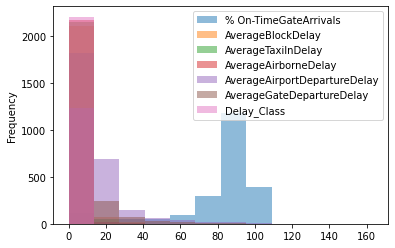

In [79]:
DAD_data.plot.hist(bins=12, alpha=0.5)

### a. Determine the nature of the classification problem. Is the current classification problem closer to a balanced classification or an unbalanced classification problem?



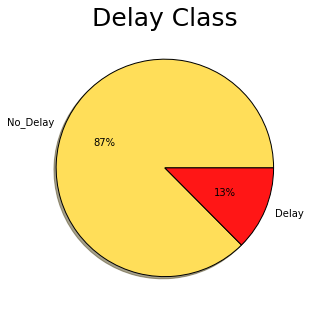

In [110]:
data1 = DAD_data['Delay_Class'].value_counts().to_dict()
plt.figure(figsize=(5,5))
plt.pie(data1.values(), labels = ['No_Delay', 'Delay'], wedgeprops={'edgecolor': 'black'}, colors = ['#ffde59', '#ff1616'], autopct='%.0f%%', shadow=True)
plt.title("Delay Class", fontsize=25)
plt.show()

**This is unbalanced classification problem because variables are unevenly distributed.**

### b. Construct a random forest classi er for the target Class in the presence of all 6 features. Calculate the relative feature importance from the constructed forest and identify the two most signi cant features. 

In [80]:
DAD_data.isna().sum()

% On-TimeGateArrivals           0
AverageBlockDelay               0
AverageTaxiInDelay              0
AverageAirborneDelay            0
AverageAirportDepartureDelay    0
AverageGateDepartureDelay       0
Delay_Class                     0
dtype: int64

In [81]:
X2= DAD_data.drop(columns=['Delay_Class'])
y2= DAD_data['Delay_Class']

# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) 

<BarContainer object of 6 artists>

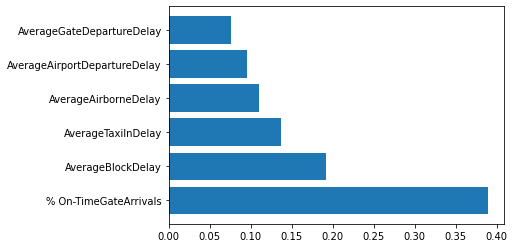

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X2_train,y2_train)

#feature importance
import matplotlib.pyplot as plt

plt.barh(X2.columns, clf.feature_importances_)

### c. 
<p align="justify">
Construct a logistic regression classifier for the classification problem. Calculate the relevant accuracy metrics, and assess the performance of your constructed classifier. What is the AUC of the corresponding ROC curve for this binary classifier? Plot decision regions in the feature space.
</p>

In [83]:
from sklearn.linear_model import LogisticRegression

X3= DAD_data[['% On-TimeGateArrivals', 'AverageBlockDelay']]
y3= DAD_data['Delay_Class']

# Split dataset into training set and test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3) 

## train logistic regression model
logreg_clf = LogisticRegression()
logreg_clf.fit(X3_train, y3_train)

LogisticRegression()

In [84]:
## getting prediction
y3_pred = logreg_clf.predict(X3_test)


In [85]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y3_test, y3_pred)

print("AUC Score is: ",auc_score,"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y3_pred))


AUC Score is:  0.7509340497880023 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       581
           1       0.88      0.51      0.65        82

    accuracy                           0.93       663
   macro avg       0.90      0.75      0.80       663
weighted avg       0.93      0.93      0.92       663



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


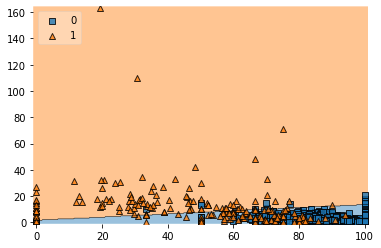

In [86]:
XX_train=X3_train.to_numpy()
yy_train=y3_train.to_numpy()
plot_decision_regions(XX_train, yy_train, clf=logreg_clf, legend=2)


**Explanation:**
- The overall accuracy is 77% whereas the f1 score is 68%. It means the imbalance class performance of the model is poor.
- Model is not overfitting.
- The minority class label 1 has an overall f1 socre of 68% which is very less as compared to the overall performance.

### d. SVC

In [87]:
from sklearn import svm
from sklearn import metrics

#models
clf_svc1 = svm.SVC(kernel='linear', C=2, gamma=0.1)
clf_svc2 = svm.SVC(kernel='rbf',C=2, gamma=0.1)
clf_svc3 = svm.SVC(kernel='sigmoid', C=2, gamma=0.1)

#Fittings
clf_svc1.fit(X3_train, y3_train)
clf_svc2.fit(X3_train, y3_train)
clf_svc3.fit(X3_train, y3_train)

#predictions
y_pred_SVC1 = clf_svc1.predict(X3_test)
y_pred_SVC2 = clf_svc2.predict(X3_test)
y_pred_SVC3 = clf_svc3.predict(X3_test)

#Accuracies
print("Accuracy of linear kernel:",metrics.accuracy_score(y3_test, y_pred_SVC1))
print("Accuracy of rbf kernel:",metrics.accuracy_score(y3_test, y_pred_SVC2))
print("Accuracy of sigmoid kernel:",metrics.accuracy_score(y3_test, y_pred_SVC3))

Accuracy of linear kernel: 0.9260935143288085
Accuracy of rbf kernel: 0.9577677224736049
Accuracy of sigmoid kernel: 0.8763197586726998


In [88]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X3_train, y3_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.922 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.874 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [89]:
print(grid.best_estimator_)


SVC(C=1, gamma=0.001)


In [90]:
clf_svc1 = svm.SVC(kernel='linear', C=10, gamma=0.001)
clf_svc2 = svm.SVC(kernel='rbf',C=10, gamma=0.001)
clf_svc3 = svm.SVC(kernel='sigmoid', C=10, gamma=0.001)

#Fittings
clf_svc1.fit(X3_train, y3_train)
clf_svc2.fit(X3_train, y3_train)
clf_svc3.fit(X3_train, y3_train)

#predictions
y_pred_SVC1 = clf_svc1.predict(X3_test)
y_pred_SVC2 = clf_svc2.predict(X3_test)
y_pred_SVC3 = clf_svc3.predict(X3_test)

#Accuracies
print("Accuracy of linear kernel:",metrics.accuracy_score(y3_test, y_pred_SVC1))
print("Accuracy of rbf kernel:",metrics.accuracy_score(y3_test, y_pred_SVC2))
print("Accuracy of sigmoid kernel:",metrics.accuracy_score(y3_test, y_pred_SVC3),"\n")

#Classification Reports
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_SVC1),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_SVC2),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_SVC3),"\n")

Accuracy of linear kernel: 0.9260935143288085
Accuracy of rbf kernel: 0.9502262443438914
Accuracy of sigmoid kernel: 0.8642533936651584 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       581
           1       0.87      0.48      0.61        82

    accuracy                           0.93       663
   macro avg       0.90      0.73      0.79       663
weighted avg       0.92      0.93      0.92       663
 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       581
           1       0.90      0.67      0.77        82

    accuracy                           0.95       663
   macro avg       0.93      0.83      0.87       663
weighted avg       0.95      0.95      0.95       663
 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       581
           1       0.36

### e. Naive Bayes Classifier

Accuracy of naive_bayes is:  0.8959276018099548 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       581
           1       0.58      0.59      0.58        82

    accuracy                           0.90       663
   macro avg       0.76      0.76      0.76       663
weighted avg       0.90      0.90      0.90       663
 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


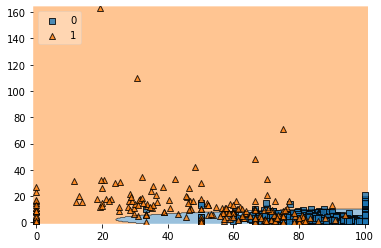

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X3_train, y3_train)

y_pred_gnb = gnb.predict(X3_test) 

print("Accuracy of naive_bayes is: ",metrics.accuracy_score(y3_test, y_pred_gnb),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_gnb),"\n")

plot_decision_regions(XX_train, yy_train, clf=gnb, legend=2)


**Explanation:**
- As we can see the input features are skewed and doesn't follow normality. 
- The assumption of gaussian naive bayes is all input features must follow 
gaussian distribution. 
- The 2nd point is dataset is imbalancedd, and the class 1 labels are more sparse as compared to class 0 labels.
- If we consider both the points then the results generated by gaussian naive bayes which is **58%** is acceptable. Because our input features doesnt follow the assumption. So model won't be able to perform ideally. As dataset is imbalance as well the decision boundry we see here is more sparse, but small for class 1. 
- Overall the results are acceptable as compared to model assumptions but output is poor.

### f. Construct an LDA classi er and carefully assess its performance. Plot the decision regions in the feature space.

Accuracy of LDA is:  0.8959276018099548 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       581
           1       0.59      0.50      0.54        82

    accuracy                           0.90       663
   macro avg       0.76      0.73      0.74       663
weighted avg       0.89      0.90      0.89       663
 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


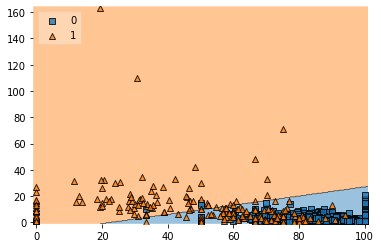

In [92]:
LDA_clf = LinearDiscriminantAnalysis()
model= LDA_clf.fit(X3_train, y3_train)

y_pred_LDA = model.predict(X3_test) 

print("Accuracy of LDA is: ",metrics.accuracy_score(y3_test, y_pred_LDA),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_LDA),"\n")

plot_decision_regions(XX_train, yy_train, clf=model, legend=2)


**Explanation:**
1. The performance of LDA is not good as compared to output class, as the dataset is not linearly separable.
2. The overall f1 score is 53% which is very less.

### g. Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
Tree_clf = DecisionTreeClassifier(criterion ='entropy', max_leaf_nodes= 20)

Tree_clf = Tree_clf.fit(X3_train,y3_train)

y_pred_tree = Tree_clf.predict(X3_test)

print("Accuracy of Decision Tree Classifier is ",metrics.accuracy_score(y3_test, y_pred_tree),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_tree),"\n")


Accuracy of Decision Tree Classifier is  0.9502262443438914 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       581
           1       0.81      0.78      0.80        82

    accuracy                           0.95       663
   macro avg       0.89      0.88      0.88       663
weighted avg       0.95      0.95      0.95       663
 



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'criterion' :['gini', 'entropy'],'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
  
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid1, refit = True, verbose = 3)
  
grid_tree.fit(X3_train, y3_train)

In [95]:
grid_tree.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8)

In [96]:
final_tree= DecisionTreeClassifier(max_leaf_nodes=6)

final_tree = final_tree.fit(X3_train,y3_train)

y_pred_tree1 = final_tree.predict(X3_test)

print("Accuracy of Decision Tree Classifier is ",metrics.accuracy_score(y3_test, y_pred_tree1),"\n")
print("Classification Report:\n",metrics.classification_report(y3_test, y_pred_tree1),"\n")


Accuracy of Decision Tree Classifier is  0.9532428355957768 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       581
           1       0.92      0.68      0.78        82

    accuracy                           0.95       663
   macro avg       0.94      0.84      0.88       663
weighted avg       0.95      0.95      0.95       663
 



**Explanation:**
1. Without hyperparameter tuning **Decision Tree model** is highly overfitting and affected by high variance present in the dataset, mostly due to minority class.
2. After hyperpatameter tuning model is not overfitting much generating a close auc score for both train and test dataset.
3. Hyperparameter tuning is able to control the overfitting.

### h. (i)

In [97]:
clf_forest=RandomForestClassifier()
clf_forest.fit(X3_train,y3_train)
y_pred_forest = clf_forest.predict(X3_test)
print("Accuracy of Random Forest Classifier is ",metrics.accuracy_score(y3_test, y_pred_forest))
print("\n",metrics.classification_report(y3_test, y_pred_forest))

Accuracy of Random Forest Classifier is  0.951734539969834

               precision    recall  f1-score   support

           0       0.97      0.98      0.97       581
           1       0.84      0.76      0.79        82

    accuracy                           0.95       663
   macro avg       0.90      0.87      0.88       663
weighted avg       0.95      0.95      0.95       663



### h. (ii)

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X3_train, y3_train)
y_pred_gb = gb_clf.predict(X3_test)
print("Accuracy of Random Forest Classifier is ",metrics.accuracy_score(y3_test, y_pred_gb))
print("\n",metrics.classification_report(y3_test, y_pred_gb))

Accuracy of Random Forest Classifier is  0.9532428355957768

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       581
           1       0.89      0.71      0.79        82

    accuracy                           0.95       663
   macro avg       0.93      0.85      0.88       663
weighted avg       0.95      0.95      0.95       663



### h(iii)

In [99]:
from sklearn.ensemble import StackingClassifier

lr = LogisticRegression()  

estimators = [
     ('rf', RandomForestClassifier(max_depth= 100, max_features= 2, min_samples_leaf= 3, min_samples_split= 10, n_estimators= 100) ),
     ('DT', DecisionTreeClassifier(max_leaf_nodes=6)),
     ('GB', GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0) )]
      
clf_Stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_Stack.fit(X3_train, y3_train)
y_pred = clf_Stack.predict(X3_test)
print("Accuracy : ",clf_Stack.fit(X3_train, y3_train).score(X3_test, y3_test))
print("\n",metrics.classification_report(y3_test, y_pred))

Accuracy :  0.9502262443438914

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       581
           1       0.86      0.72      0.78        82

    accuracy                           0.95       663
   macro avg       0.91      0.85      0.88       663
weighted avg       0.95      0.95      0.95       663



### i. In this problem, if you focus is on the y == 1 class (i.e. delayed gate arrivals), which classifier among all classifiers you constructed in previous parts gives you the highest f1-score for this class?

**Answer:**

1. We can see here that the best model to generate high f1 score is **Random Forest Classifier** with 81% f1 score for y==1.
2. And the model with least f1 score is **svc sigmoid** model with 13% for y==1.

# Question 6
Ensemble Methods Applied to Regression Problems: Consider the same dataset (GateArrivalDelay.csv) in problem 4 of HW 1. Use one of the ensemble learning methods for regression to construct a model whose accuracy (R2-Score) beats the highest accuracy you could acheive in HW1. Make sure the model you constuct in the problem is not suffering from a severe high variance problem.

In [100]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score


In [102]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/GateArrivalDelay.csv')
df_1.head()

,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,AverageGateArrivalDelay
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,4.70
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,14.73
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,11.38
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,7.08
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,4.09


In [103]:
X = df_1.drop(columns = ['Date_Time', 'AverageGateArrivalDelay'])
y = df_1['AverageGateArrivalDelay']

## split the dataset using train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1765, 6), (442, 6), (1765,), (442,))

In [ ]:
parameters =  {'n_estimators': [100, 300, 500],
               'max_depth': [60, 6, 7, 8, 9 ,10],
               'min_samples_split': [2, 5, 10], 
               'min_samples_leaf': [1, 2, 3],
               'random_state':[1]}

forest_model = RandomForestRegressor()

#fitting the model
clf2 = GridSearchCV(forest_model, parameters, cv=8, scoring='r2', verbose=1, n_jobs=-1)
clf2.fit(X_train, Y_train)

randon_forest = clf2.best_estimator_
randon_forest.fit(X_train, Y_train)

## getting prediction
y_pred_train = randon_forest.predict(X_train)
y_pred = randon_forest.predict(X_test)

acc_train = metrics.r2_score(Y_train, y_pred_train)
acc_test = metrics.r2_score(Y_test, y_pred)


In [114]:
print(f"Accuracy Score of Train Data: {acc_train : .4f} \nAccuracy Score of Test Data :{acc_test : .4f}\n")


Accuracy Score of Train Data:  0.9448 
Accuracy Score of Test Data : 0.7811



**Explanation:**

- The highest accuracy score I achieved in HW1 is **70.27%**. As we can see here this model's accuracy score has surpassed that comfortably.